In [56]:
# import necessary modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [57]:
production = pd.read_csv("data/time_series_60min_singleindex.csv",
                        usecols=(lambda s: s.startswith('utc') | s.startswith('DE')),
                        parse_dates=[0], index_col=0)

In [60]:
production.dropna(axis='columns')
production.head(3)
production.tail(3)

,DE_load_actual_entsoe_power_statistics,DE_load_actual_entsoe_transparency,DE_load_forecast_entsoe_transparency,DE_price_day_ahead,DE_solar_capacity,DE_solar_generation_actual,DE_solar_profile,DE_wind_capacity,DE_wind_generation_actual,DE_wind_profile,...,DE_tennet_wind_generation_forecast,DE_tennet_wind_offshore_generation_actual,DE_tennet_wind_onshore_generation_actual,DE_transnetbw_load_actual_entsoe_transparency,DE_transnetbw_load_forecast_entsoe_transparency,DE_transnetbw_solar_generation_actual,DE_transnetbw_solar_generation_forecast,DE_transnetbw_wind_generation_actual,DE_transnetbw_wind_generation_forecast,DE_transnetbw_wind_onshore_generation_actual
utc_timestamp,,,,,,,,,,,,,,,,,,,,,
2016-12-31 21:00:00+00:00,51410.8878,47205.0,44702.0,33.71,40634.0,0.0,0.0,49021.0,14848.0,0.3029,...,9438.0,2974.0,5766.0,6208.0,5574.0,0.0,0.0,38.0,58.0,38.0
2016-12-31 22:00:00+00:00,49987.3673,45548.0,41879.0,27.95,40634.0,0.0,0.0,49021.0,15056.0,0.3071,...,9444.0,2976.0,5774.0,6071.0,5312.0,0.0,0.0,54.0,68.0,54.0
2016-12-31 23:00:00+00:00,48811.2449,44512.0,39438.0,20.96,40636.0,0.0,0.0,49025.0,15422.0,0.3146,...,9543.0,2971.0,5821.0,5953.0,4617.0,0.0,0.0,70.0,44.0,70.0


In [61]:
#we are interested in 2016 
production = production.loc[production.index.year == 2016, :]

In [62]:
production.head(3)
production.tail(3)

,DE_load_actual_entsoe_power_statistics,DE_load_actual_entsoe_transparency,DE_load_forecast_entsoe_transparency,DE_price_day_ahead,DE_solar_capacity,DE_solar_generation_actual,DE_solar_profile,DE_wind_capacity,DE_wind_generation_actual,DE_wind_profile,...,DE_tennet_wind_generation_forecast,DE_tennet_wind_offshore_generation_actual,DE_tennet_wind_onshore_generation_actual,DE_transnetbw_load_actual_entsoe_transparency,DE_transnetbw_load_forecast_entsoe_transparency,DE_transnetbw_solar_generation_actual,DE_transnetbw_solar_generation_forecast,DE_transnetbw_wind_generation_actual,DE_transnetbw_wind_generation_forecast,DE_transnetbw_wind_onshore_generation_actual
utc_timestamp,,,,,,,,,,,,,,,,,,,,,
2016-12-31 21:00:00+00:00,51410.8878,47205.0,44702.0,33.71,40634.0,0.0,0.0,49021.0,14848.0,0.3029,...,9438.0,2974.0,5766.0,6208.0,5574.0,0.0,0.0,38.0,58.0,38.0
2016-12-31 22:00:00+00:00,49987.3673,45548.0,41879.0,27.95,40634.0,0.0,0.0,49021.0,15056.0,0.3071,...,9444.0,2976.0,5774.0,6071.0,5312.0,0.0,0.0,54.0,68.0,54.0
2016-12-31 23:00:00+00:00,48811.2449,44512.0,39438.0,20.96,40636.0,0.0,0.0,49025.0,15422.0,0.3146,...,9543.0,2971.0,5821.0,5953.0,4617.0,0.0,0.0,70.0,44.0,70.0


In [63]:
#There 8784 entries, which correspond to the number of hours in a leap year like 2016
production.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8784 entries, 2016-01-01 00:00:00+00:00 to 2016-12-31 23:00:00+00:00
Data columns (total 59 columns):
DE_load_actual_entsoe_power_statistics             8784 non-null float64
DE_load_actual_entsoe_transparency                 8784 non-null float64
DE_load_forecast_entsoe_transparency               8736 non-null float64
DE_price_day_ahead                                 8783 non-null float64
DE_solar_capacity                                  8784 non-null float64
DE_solar_generation_actual                         8784 non-null float64
DE_solar_profile                                   8784 non-null float64
DE_wind_capacity                                   8784 non-null float64
DE_wind_generation_actual                          8784 non-null float64
DE_wind_profile                                    8784 non-null float64
DE_wind_offshore_capacity                          8784 non-null float64
DE_wind_offshore_generation_actual        

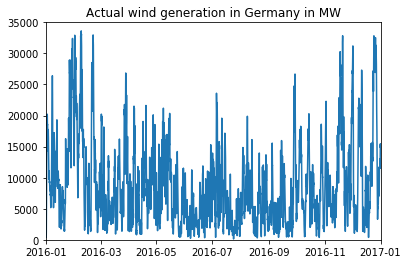

In [64]:
# create plot
plt.plot(production.index, production['DE_wind_generation_actual'])
plt.title('Actual wind generation in Germany in MW')
plt.xlim(pd.Timestamp('2016-01-01'), pd.Timestamp('2017-01-01'))
plt.ylim(0, 35000)

# save plot
plt.savefig("plots/wind.png", dpi=200)

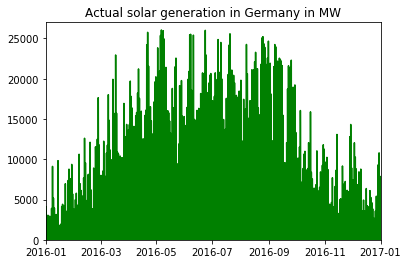

In [65]:
# create plot
plt.plot(production.index, production['DE_solar_generation_actual'], c='green')
plt.title('Actual solar generation in Germany in MW')
plt.xlim(pd.Timestamp('2016-01-01'), pd.Timestamp('2017-01-01'))
plt.ylim(0, 27000)

# save plot
plt.savefig("plots/solar.png", dpi=200)

In [66]:
weather = pd.read_csv("data/weather_data_filtered.csv",
                     parse_dates=[0], index_col=0)

In [67]:
weather.head(3)
weather.tail(3)

,BG_temperature,BG_radiation_direct_horizontal,BG_radiation_diffuse_horizontal,EE_temperature,EE_radiation_direct_horizontal,EE_radiation_diffuse_horizontal,ES_temperature,ES_radiation_direct_horizontal,ES_radiation_diffuse_horizontal,FI_temperature,...,LU_radiation_direct_horizontal,LU_radiation_diffuse_horizontal,NL_windspeed_10m,NL_temperature,NL_radiation_direct_horizontal,NL_radiation_diffuse_horizontal,PL_windspeed_10m,PL_temperature,PL_radiation_direct_horizontal,PL_radiation_diffuse_horizontal
utc_timestamp,,,,,,,,,,,,,,,,,,,,,
2016-12-31 21:00:00+00:00,-8.376,0.0,0.0,3.363,0.0,0.0,5.639,0.0,0.0,1.007,...,0.0,0.0,7.11,1.461,0.0,0.0,5.74,-2.793,0.0,0.0
2016-12-31 22:00:00+00:00,-8.866,0.0,0.0,3.393,0.0,0.0,5.232,0.0,0.0,0.704,...,0.0,0.0,7.18,1.369,0.0,0.0,5.76,-2.849,0.0,0.0
2016-12-31 23:00:00+00:00,-9.212,0.0,0.0,3.456,0.0,0.0,4.828,0.0,0.0,0.402,...,0.0,0.0,7.20,1.283,0.0,0.0,5.77,-2.913,0.0,0.0


In [68]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8784 entries, 2016-01-01 00:00:00+00:00 to 2016-12-31 23:00:00+00:00
Columns: 246 entries, BG_temperature to PL_radiation_diffuse_horizontal
dtypes: float64(246)
memory usage: 16.6 MB


In [69]:

weather.loc[weather.index == '2016-01-01 00:00:00', :]

,BG_temperature,BG_radiation_direct_horizontal,BG_radiation_diffuse_horizontal,EE_temperature,EE_radiation_direct_horizontal,EE_radiation_diffuse_horizontal,ES_temperature,ES_radiation_direct_horizontal,ES_radiation_diffuse_horizontal,FI_temperature,...,LU_radiation_direct_horizontal,LU_radiation_diffuse_horizontal,NL_windspeed_10m,NL_temperature,NL_radiation_direct_horizontal,NL_radiation_diffuse_horizontal,PL_windspeed_10m,PL_temperature,PL_radiation_direct_horizontal,PL_radiation_diffuse_horizontal
utc_timestamp,,,,,,,,,,,,,,,,,,,,,
2016-01-01 00:00:00+00:00,-9.175,0.0,0.0,-7.673,0.0,0.0,8.832,0.0,0.0,-6.118,...,0.0,0.0,6.69,5.421,0.0,0.0,3.35,-8.731,0.0,0.0


In [70]:
weather_by_day = weather.groupby(weather.index).mean()

In [71]:
weather_by_day.head(24)

,BG_temperature,BG_radiation_direct_horizontal,BG_radiation_diffuse_horizontal,EE_temperature,EE_radiation_direct_horizontal,EE_radiation_diffuse_horizontal,ES_temperature,ES_radiation_direct_horizontal,ES_radiation_diffuse_horizontal,FI_temperature,...,LU_radiation_direct_horizontal,LU_radiation_diffuse_horizontal,NL_windspeed_10m,NL_temperature,NL_radiation_direct_horizontal,NL_radiation_diffuse_horizontal,PL_windspeed_10m,PL_temperature,PL_radiation_direct_horizontal,PL_radiation_diffuse_horizontal
utc_timestamp,,,,,,,,,,,,,,,,,,,,,
2016-01-01 00:00:00+00:00,-9.175,0.000000,0.000000,-7.673,0.000000,0.000000,8.832,0.000000,0.000000,-6.118,...,0.000000,0.000000,6.69,5.421,0.000000,0.000000,3.35,-8.731,0.000000,0.000000
2016-01-01 01:00:00+00:00,-9.450,0.000000,0.000000,-7.603,0.000000,0.000000,8.697,0.000000,0.000000,-6.287,...,0.000000,0.000000,5.91,5.546,0.000000,0.000000,3.31,-8.784,0.000000,0.000000
2016-01-01 02:00:00+00:00,-9.729,0.000000,0.000000,-7.586,0.000000,0.000000,8.618,0.000000,0.000000,-6.453,...,0.000000,0.000000,5.18,5.559,0.000000,0.000000,3.27,-8.797,0.000000,0.000000
2016-01-01 03:00:00+00:00,-9.989,0.000000,0.000000,-7.580,0.000000,0.000000,8.625,0.000000,0.000000,-6.601,...,0.000000,0.000000,4.34,5.268,0.000000,0.000000,3.23,-8.851,0.000000,0.000000
2016-01-01 04:00:00+00:00,-10.204,0.000000,0.000000,-7.614,0.000000,0.000000,8.650,0.000000,0.000000,-6.728,...,0.000000,0.000000,3.73,5.072,0.000000,0.000000,3.25,-8.904,0.000000,0.000000
2016-01-01 05:00:00+00:00,-10.380,0.242549,0.797151,-7.701,0.000000,0.000000,8.665,0.000000,0.000000,-6.831,...,0.000000,0.000000,3.05,5.033,0.000000,0.000000,3.24,-8.939,0.000000,0.000000
2016-01-01 06:00:00+00:00,-9.423,50.373149,29.716751,-7.790,0.000007,0.000093,8.682,0.000000,0.000000,-6.968,...,0.000000,0.000000,2.23,5.074,0.000000,0.000000,3.22,-8.928,0.175881,1.059619
2016-01-01 07:00:00+00:00,-6.939,188.129680,41.151520,-7.823,0.899883,7.461817,8.749,0.156924,3.947176,-7.107,...,0.011117,0.965883,1.68,5.024,0.004858,0.220842,3.50,-8.362,10.477429,31.473471
2016-01-01 08:00:00+00:00,-4.464,308.271164,44.045736,-7.589,10.246549,38.301451,9.507,3.768588,48.665512,-7.135,...,0.258718,16.528782,1.57,4.933,2.294506,28.593894,3.76,-7.219,44.871609,72.075191
